# YULU : Business Case Study - Hypothesis Testing

# About YULU

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# Problem Statement

The company wants to know:

*   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

*   How well those variables describe the electric cycle demands

**Dataset Link:**  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Column Profiling:

**datetime:** datetime

**season:** season (1: spring, 2: summer, 3: fall, 4: winter)
holiday: whether day is a holiday or not

**workingday:** if day is neither weekend nor holiday is 1, otherwise is 0.

**weather:**

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp: temperature in Celsius

**atemp:** feeling temperature in Celsius

**humidity:** humidity

**windspeed:** wind speed

**casual:** count of casual users

**registered:** count of registered users

**count:** count of total rental bikes including both casual and registered

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import ttest_ind, chisquare, chi2_contingency, f_oneway, shapiro, levene, kruskal

**Reading the dataset**

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")


**Checking the shape of the dataset**

In [ ]:
df.shape

(10886, 12)

**Insight :**

*   There are about 10886 rows and 12 columns in the given dataset.

**Checking the basic details of records of the dataset**

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


**Checking the columns in the dataset**

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**Column Profiling:**

*   datetime: datetime
*   season: season (1: spring, 2: summer, 3: fall, 4: winter)
*   holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
*   workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
*   weather:

     1: Clear, Few clouds, partly cloudy, partly cloudy

     2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

     3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

     4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

*   temp: temperature in Celsius
atemp: feeling temperature in Celsius
*   humidity: humidity
*   windspeed: wind speed
*   casual: count of casual users
*   registered: count of registered users
*   count: count of total rental bikes including both casual and registered

# Basic datacleaning

**Checking the data type and non-null count for each column**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Checking for nulls in each column**

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**Insight:**

There are no null values in the given dataset, as each column contains 10886 number of non-null values which is same as the total number of rows in the dataset.

**Checking for any duplicated records**

In [ ]:
np.any(df.duplicated())

False

**Insight :**

*   It is evident that there are no duplicate records found.

In [ ]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Converting the datatype of datetime column from object to datetime

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
dmin ,dmax = df['datetime'].dt.date.min(), df['datetime'].dt.date.max()
print('[',dmin ,',\t', dmax,']')

[ 2011-01-01 ,	 2012-12-19 ]


**Insights:**

*   The given dataset is from January 2011 to December 2012, and the range is about 2 complete years.

**Changing the values in the column season as**
  
*   1 = 'spring'

*   2 = 'summer'

*   3 = 'fall'

*   4 = 'winter'

In [ ]:
df['season'].replace([1, 2, 3, 4], ['spring', 'summer', 'fall', 'winter'],inplace = True)

In [ ]:
df.dtypes

datetime      datetime64[ns]
season                object
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

# Changing the datatype of the columns season, holiday, workingday, weather to category

In [ ]:
c = ['season', 'holiday', 'workingday', 'weather']
for i in c:
    df[c] = df[c].astype('category')

# Statisctical summary

In [ ]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Insights :**

*   The above table provides all the statistical details such as mean , median, standard deviation, minimum, maximum, range, 25th and 75th percentile values for each column.

*   The mean count of total bikes rented is 192, and the median count is 145.

*   Almost 75 percentage of bikes rented were <= 284 count.

*   The average temp when most bikes were rented is 20.23 degrees Celsius.

*   Only 25 percent of bikes were rented when the temperature is below 14 degrees Celsius.

*   About 75 percent of the bikes that were rented when the humidity is <= 77


In [ ]:
df.describe(include='category')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,winter,0,1,1
freq,2734,10575,7412,7192


**Insights :**

*   The above table provides the details of unique attributes, top most occurring and its frequency values for each column.

*   Maximum number of bikes were rented in winter season with a frequency count of 2734.

*    About 7412 number of electric cycles were rented when it is a working day (on weekdays).

*   Almost 97 % of the bikes were rented on non-holiday days.

# Checking for the number of unique values in each column

In [ ]:
for i in list(df.columns):
    print(i , '     :  ', df[i].nunique())

datetime      :   10886
season      :   4
holiday      :   2
workingday      :   2
weather      :   4
temp      :   49
atemp      :   60
humidity      :   89
windspeed      :   28
casual      :   309
registered      :   731
count      :   822


# Univariant Analysis

## 1. Numerical Attribiutes

In [ ]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
for i in num_cols:
    print(i ,' : ')
    print(df[i].value_counts())
    print('-'*80)

temp  : 
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64
--------------------------------------------------------------------------------
atemp  : 
31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282


In [ ]:
num_cols = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

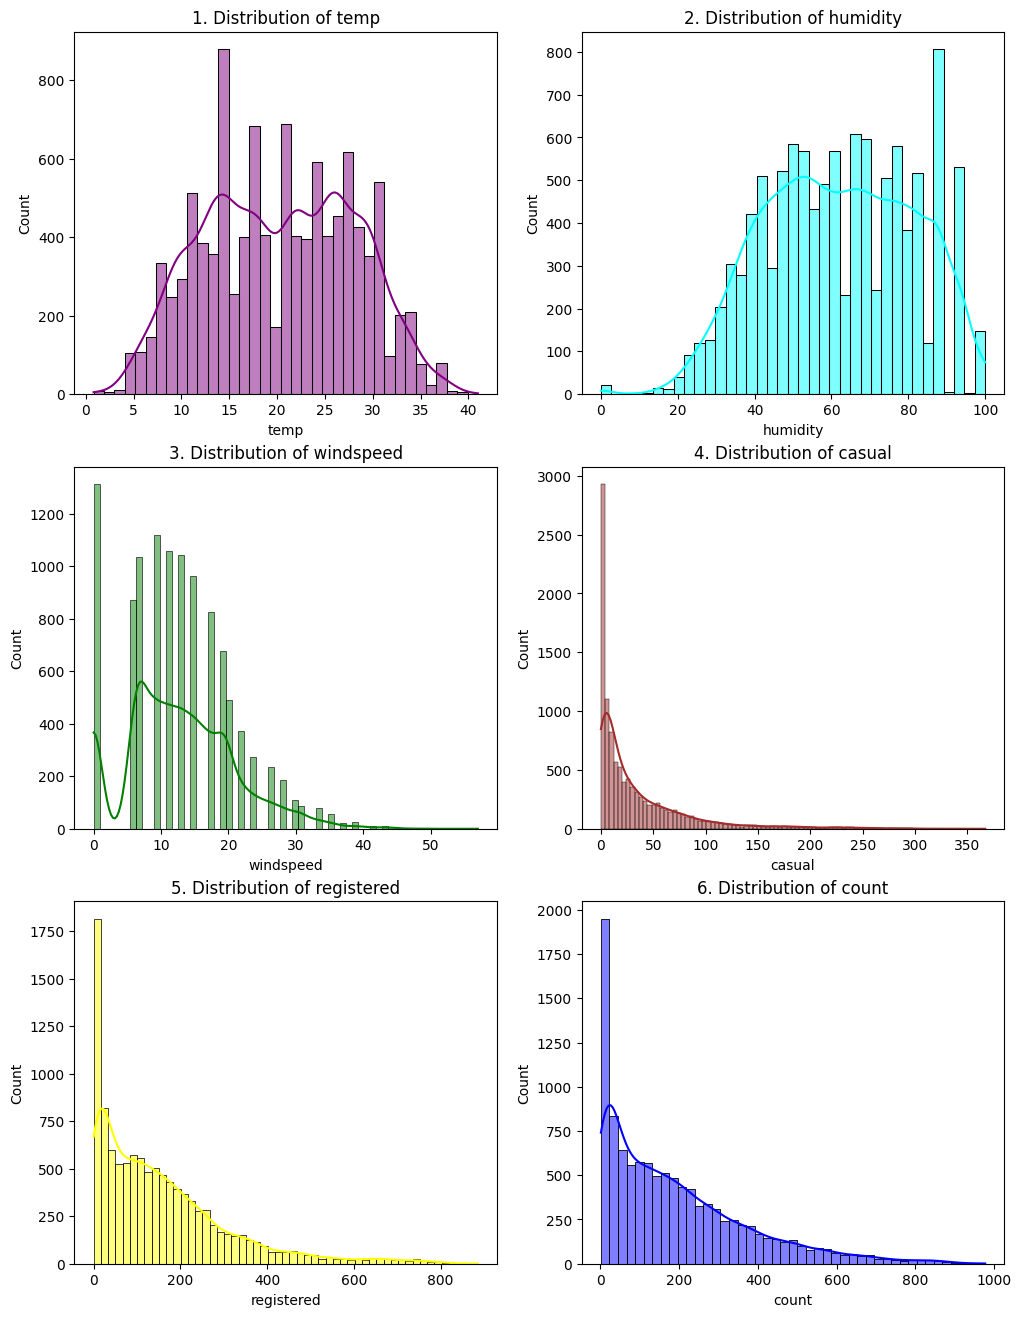

In [ ]:
fig, axis = plt.subplots(3,2,figsize =(12,16))
clr = ['purple', 'cyan', 'green', 'brown', 'yellow', 'blue']
c = 0
for i  in range(3):
    for j in range(2):
       sns.histplot(df[num_cols[c]],kde = True,color = clr[c], ax=axis[i,j])
       axis[i,j].set_title(f'{c+1}. Distribution of {num_cols[c]}')
       c += 1
plt.show()

**Insights :**

*   From the above plots we see that only temp and humidity are likely to follow normal distribution.

*   The rest of the columns like windspeed, casual, registered and count do not follow normal distribution rather they are right skewed (tailed).


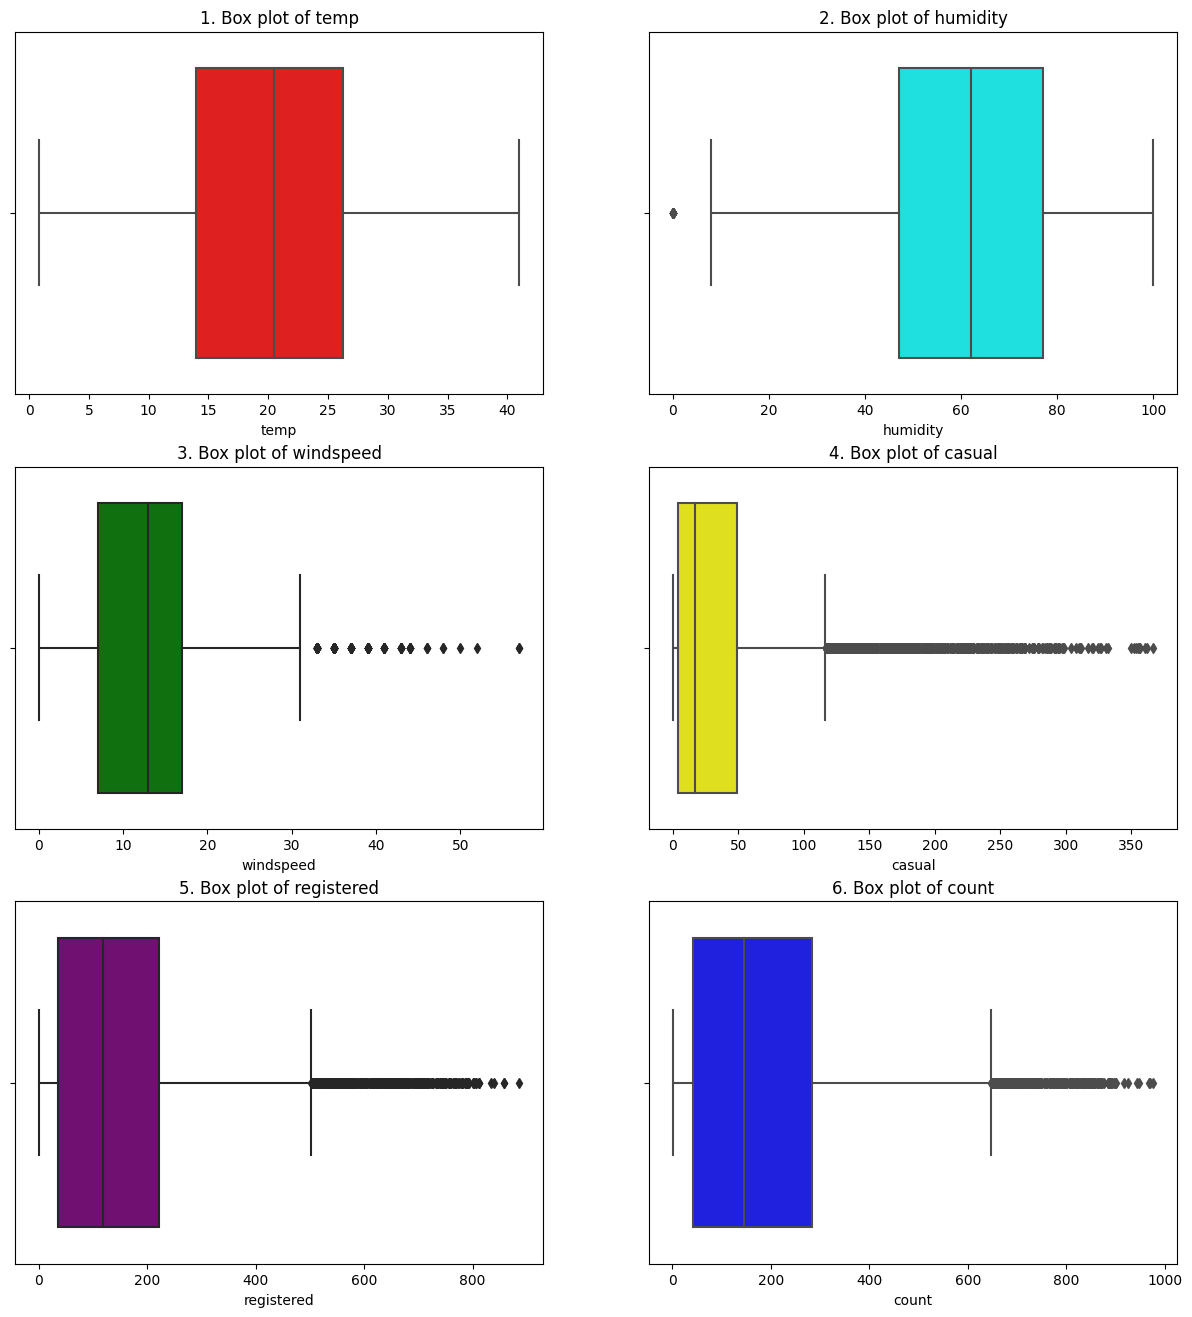

In [ ]:
fig, axis = plt.subplots(3,2,figsize =(15,16))
clr = ['red', 'cyan', 'green', 'yellow', 'purple', 'blue']
c = 0
for i  in range(3):
    for j in range(2):
       sns.boxplot(data=df, x = num_cols[c],color = clr[c], ax=axis[i,j])
       axis[i,j].set_title(f'{c+1}. Box plot of {num_cols[c]}')
       c += 1
plt.show()

**Insights :**

*   From the above plot it is observed that there are many outliers in windspeed, casual, registered and count columns.

**We are further proceeding in finding the percentage of outliers found in these columns and check if they significantly affect the business or not ?**

In [ ]:
# for windspeed
Q1, Q3 = np.percentile(df['windspeed'], [25,75])
IQR = Q3 - Q1
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR
print('The lower and upper fence for windspeed :',lower_fence.round(2),'\t', upper_fence.round(2))
outlier_perct = np.round(len(df.loc[df['windspeed']>upper_fence])/len(df.index)*100,2)
print("The percentage of outliers in windspeed : ", outlier_perct, '%')

The lower and upper fence for windspeed : -7.99 	 31.99
The percentage of outliers in windspeed :  2.09 %


In [ ]:
# for casual
Q1, Q3 = np.percentile(df['casual'], [25,75])
IQR = Q3 - Q1
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR
print('The lower and upper fence for casual :',lower_fence.round(2),'\t', upper_fence.round(2))
outlier_perct = np.round(len(df.loc[df['casual']>upper_fence])/len(df.index)*100,2)
print("The percentage of outliers in casual : ", outlier_perct, '%')

The lower and upper fence for casual : -63.5 	 116.5
The percentage of outliers in casual :  6.88 %


In [ ]:
# for registered
Q1, Q3 = np.percentile(df['registered'], [25,75])
IQR = Q3 - Q1
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR
print('The lower and upper fence for registered :',lower_fence.round(2),'\t', upper_fence.round(2))
outlier_perct = np.round(len(df.loc[df['registered']>upper_fence])/len(df.index)*100,2)
print("The percentage of outliers in registered : ", outlier_perct, '%')

The lower and upper fence for registered : -243.0 	 501.0
The percentage of outliers in registered :  3.89 %


In [ ]:
# for count
Q1, Q3 = np.percentile(df['count'], [25,75])
IQR = Q3 - Q1
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR
print('The lower and upper fence for count :',lower_fence.round(2),'\t', upper_fence.round(2))
outlier_perct = np.round(len(df.loc[df['count']>upper_fence])/len(df.index)*100,2)
print("The percentage of outliers in count : ", outlier_perct, '%')

The lower and upper fence for count : -321.0 	 647.0
The percentage of outliers in count :  2.76 %


**Insights :**

*   Since the percentage of outlier detected in these columns are very low, we can neglect it.

## 2. Categorical Attributes

In [ ]:
cat_cols = ['season', 'holiday', 'workingday', 'weather']

<ipython-input-28-c2514bcfb13e>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,i)
<ipython-input-28-c2514bcfb13e>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,i+1)
<ipython-input-28-c2514bcfb13e>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,i)
<ipython-input-28-c2514bcfb13e>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,2,i+1)
<ipython-input-28-c2514bcfb13e>:5: MatplotlibDeprecationWarning: Auto-removal of o

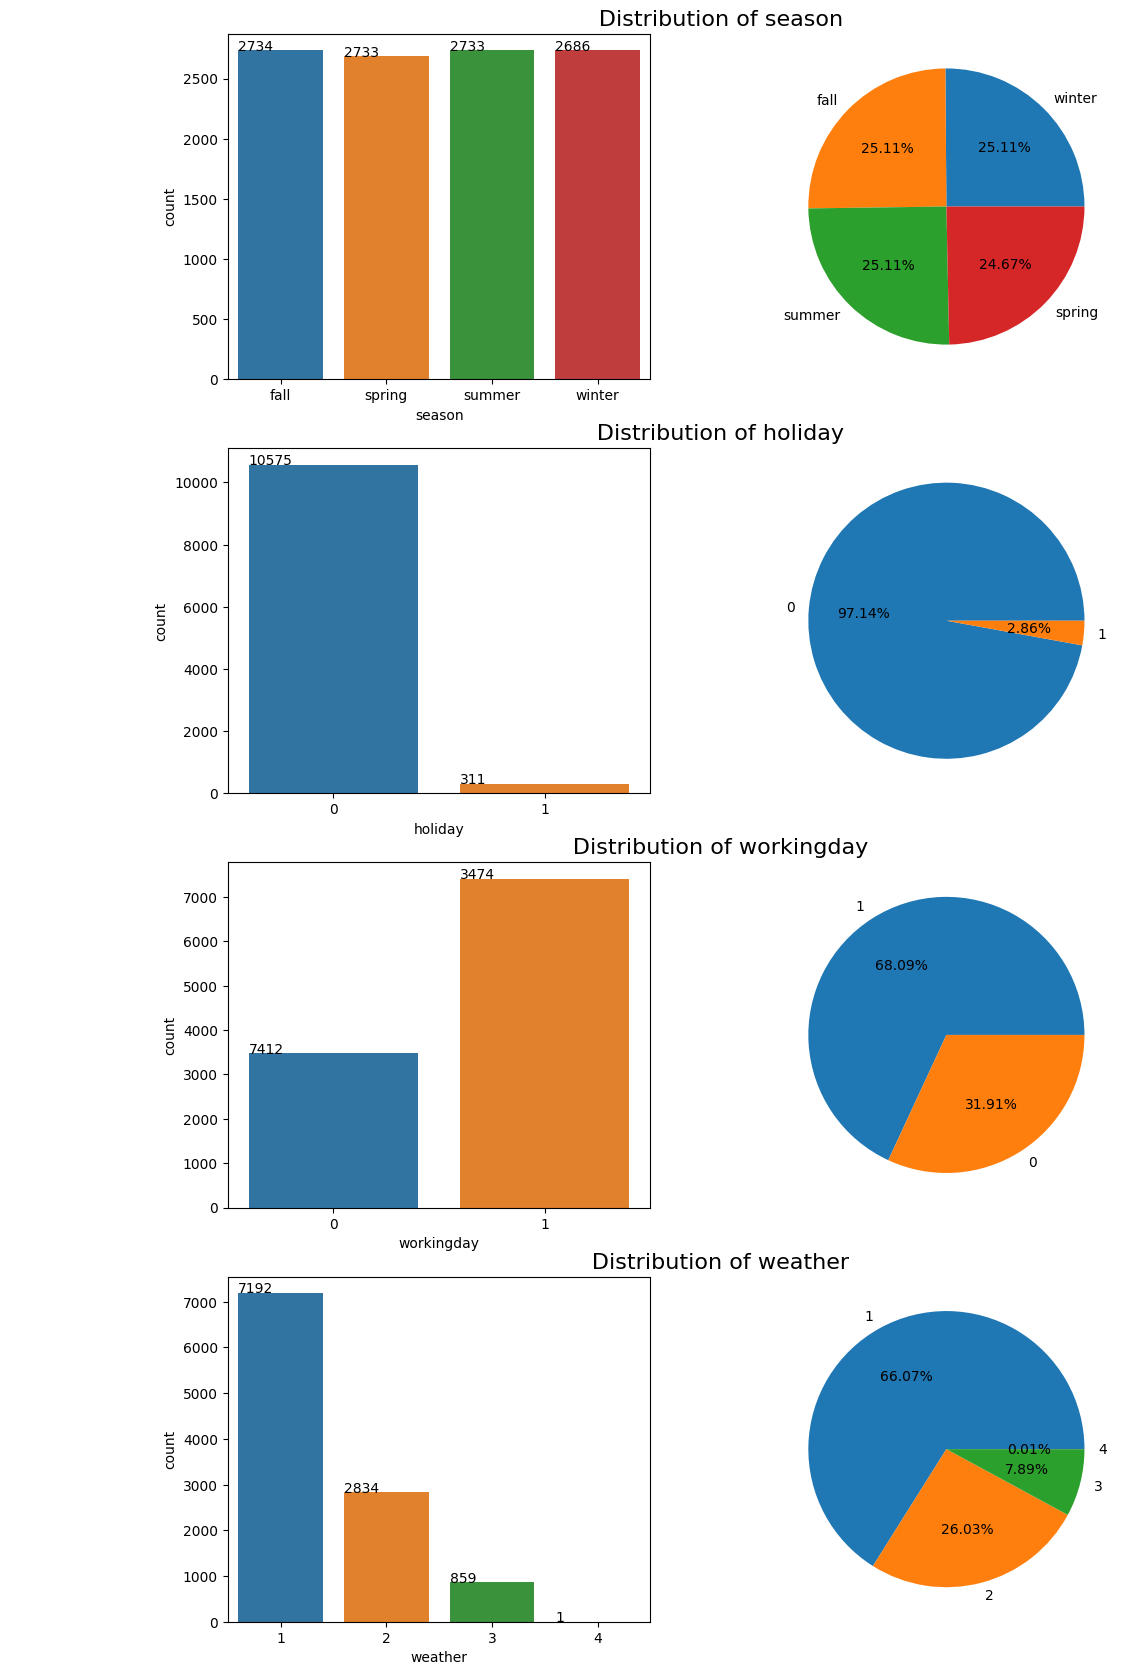

In [ ]:
fig , axis = plt.subplots(4,2,figsize=(12,26))
sns.color_palette("pastel")
c=0
for i in [1,3,5,7]:
    plt.subplot(5,2,i)
    plt.title(f'                                                                               Distribution of {cat_cols[c]}', fontsize =16)
    ax = sns.countplot(data = df, x = cat_cols[c])

    for p, label in zip(ax.patches, df[cat_cols[c]].value_counts()):
         ax.annotate(label, (p.get_x(), p.get_height()+0.2))

    plt.subplot(5,2,i+1)
    plt.pie(df[cat_cols[c]].value_counts(), labels = df[cat_cols[c]].value_counts().index, autopct ='%.02f%%' )
    c+=1

plt.show()

**Insights :**

*   From the plot it is observed that all the seasons are more likely to have same number of electric cycles rented.

*   Only about 3% of the total bikes were rented on holidays and the rest 97% of bikes were rented on non-holiday days.

*   Almost 68% of the bikes were rented on weekdays, and 32% of bikes were rented on weekdays.

*   About 66% of bikes were rented on days having weather 1 ( clear, few clouds, partly cloudy), and a very negligible number 0.01% of bikes were rented on days having weather 4 (heavy rain, ice pallets, thunderstorm, mist, snow+ fog).

## 3. Datetime Attribute

**Checking the trend of average of casual, registered and count across each month - year**

In [ ]:
a = df.groupby(df['datetime'].dt.strftime('%y -%m'))['casual', 'registered', 'count'].agg('mean')
a = a.reset_index()
a.columns = ['Year_month', 'casual_mean', 'registered_mean', 'count_mean']

<ipython-input-29-f8e733ed6b01>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = df.groupby(df['datetime'].dt.strftime('%y -%m'))['casual', 'registered', 'count'].agg('mean')


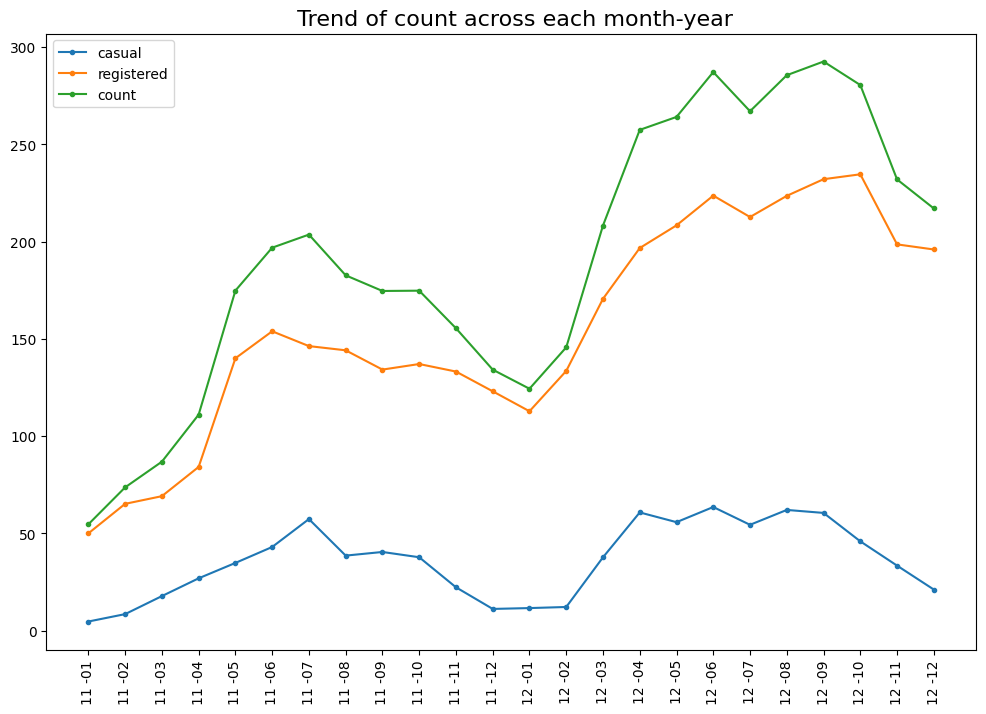

In [ ]:
fig1 = plt.figure(figsize= (12,8))
plt.title(' Trend of count across each month-year',fontsize=16)
plt.plot(a['Year_month'],  a['casual_mean'], '.-' )
plt.plot(a['Year_month'],  a['registered_mean'], '.-' )
plt.plot(a['Year_month'],  a['count_mean'], '.-' )
plt.legend(['casual','registered','count'])
plt.xticks(rotation = 90)
plt.show()

**Insights :**

*   There is a positive growth in the number of bikes that were rented across each month over the year.

*   Thus there is significant increase in demand for the bikes in the upcoming years too.

**Checking the trend of average casual, registered and count across each month**

In [ ]:
m = df.groupby(df['datetime'].dt.month)['casual', 'registered', 'count'].agg('mean')
m= m.reset_index()

<ipython-input-31-8756feee84b8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  m = df.groupby(df['datetime'].dt.month)['casual', 'registered', 'count'].agg('mean')


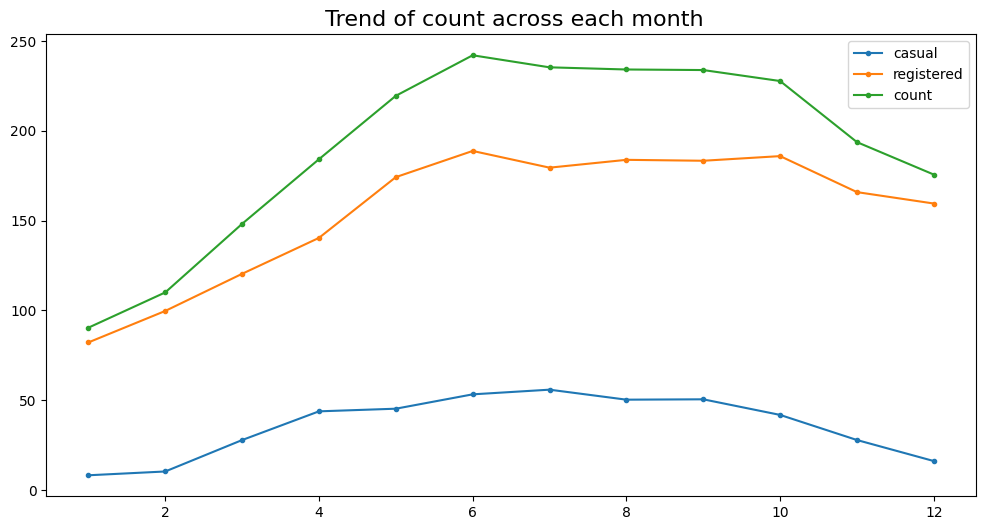

In [ ]:
fig2 = plt.figure(figsize= (12,6))
plt.title(' Trend of count across each month',fontsize=16)
plt.plot(m['datetime'],  m['casual'], '.-' )
plt.plot(m['datetime'],  m['registered'], '.-' )
plt.plot(m['datetime'],  m['count'], '.-' )
plt.legend(['casual','registered','count'])
plt.show()

**Insights :**

*   There is a drastic rise in the demand for the number of rental bikes over the first 6 months, later it becomes stagnant and gradually decreases over the end of the year.

**Checking the trend of average casual, registered and count across each hour**

In [ ]:
h = df.groupby(df['datetime'].dt.hour)['casual', 'registered', 'count'].agg('mean')
h = h.reset_index()

<ipython-input-33-824c11c51a5b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  h = df.groupby(df['datetime'].dt.hour)['casual', 'registered', 'count'].agg('mean')


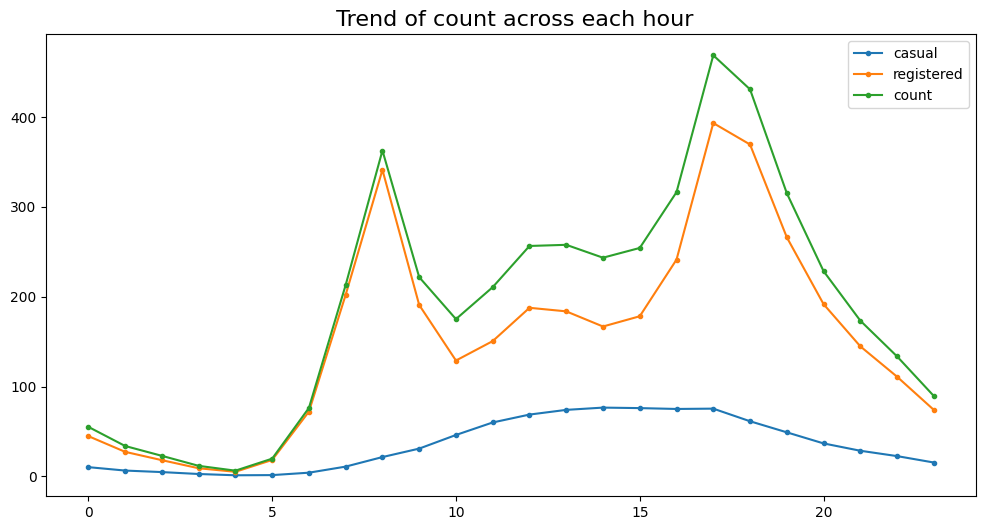

In [ ]:
fig3 = plt.figure(figsize= (12,6))
plt.title(' Trend of count across each hour',fontsize=16)
plt.plot(h['datetime'],  h['casual'], '.-' )
plt.plot(h['datetime'],  h['registered'], '.-' )
plt.plot(h['datetime'],  h['count'], '.-' )
plt.legend(['casual','registered','count'])
plt.show()

**Insights :**

*   From the above plot it is inferred that maximum number of bikes were rented during peak hours of the day be it in the morning from 6 am to 9 am and evening from 3 pm to 7 pm.

# Bivariant Analysis

## Two Categorical attributes - dodged countplot

<Axes: xlabel='holiday', ylabel='count'>

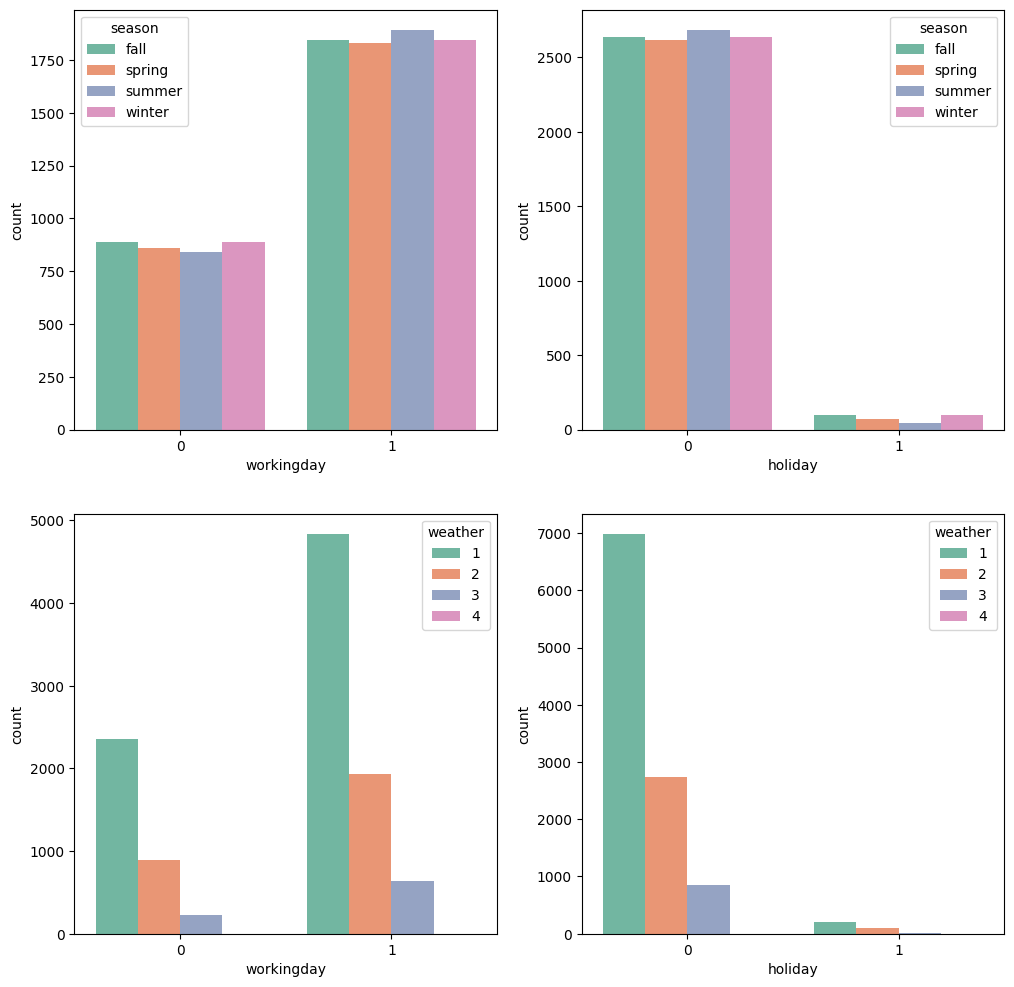

In [ ]:
fig = plt.subplots(2,2,figsize =(12,12))
plt.subplot(2,2,1)
sns.countplot(df, x = 'workingday', hue = 'season', palette = 'Set2')
plt.subplot(2,2,2)
sns.countplot(df, x = 'holiday', hue = 'season', palette = 'Set2')
plt.subplot(2,2,3)
sns.countplot(df, x = 'workingday', hue = 'weather', palette = 'Set2')
plt.subplot(2,2,4)
sns.countplot(df, x = 'holiday', hue = 'weather', palette = 'Set2')

**Insights :**

*   The above plot tells us that irrespective of the season, the maximum number of bikes were rented on weekdays compared to the weekends.

*   Also, irrespective of the season, the maximum number of bikes were rented on non-holiday days compared to the days which are a holiday.

*   Its is also observed that whether it is a working or a non-working day most number of bikes were rented on the days having a clear, few clouds or partly cloudy weather (weather 1).

*   On the non-holiday days most number of bikes were rented on the days having a clear, few clouds or partly cloudy weather (weather 1).


## Categorical and Numerical attributes - multi boxplot

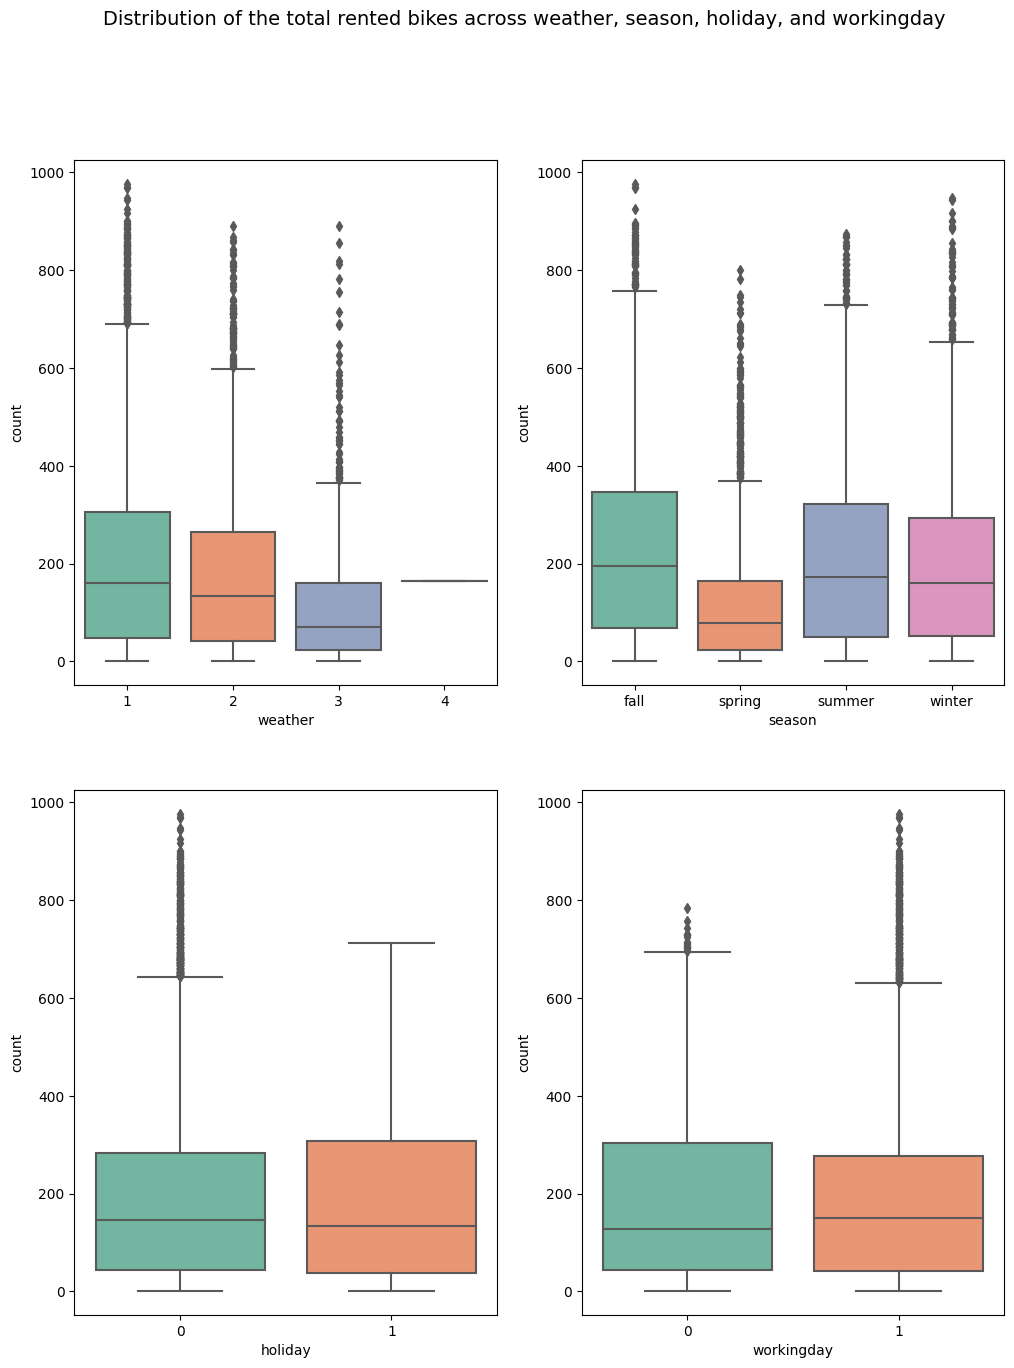

In [ ]:
fig = plt.subplots(2,2,figsize =(12,15))
att = ['weather', 'season', 'holiday', 'workingday']
plt.suptitle('Distribution of the total rented bikes across weather, season, holiday, and workingday', fontsize =14)

for i in range(len(att)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df, x = att[i], y = 'count', palette = 'Set2')
plt.show()

**Insights :**

*   The median of count is greater for the days having weather 1 (clear, few clouds) compared to the days having weather 2,3 and 4.

*   The median of count is greater for the season- fall compared to other seasons.

*   The median is almost same for holiday and non holiday days.

*   The median is almost same for weekdays and weekends.

## Two Numerical attributes - Scatter plot

<ipython-input-37-2bcb410b3d04>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(df, x = att[i], y = 'count', palette = 'Set2')
<ipython-input-37-2bcb410b3d04>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(df, x = att[i], y = 'count', palette = 'Set2')
<ipython-input-37-2bcb410b3d04>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(df, x = att[i], y = 'count', palette = 'Set2')
<ipython-input-37-2bcb410b3d04>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(df, x = att[i], y = 'count', palette = 'Set2')
<ipython-input-37-2bcb410b3d04>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,3)
<ipython-input-37-2bcb410b3d04>:7: UserWarning: Ignoring `palett

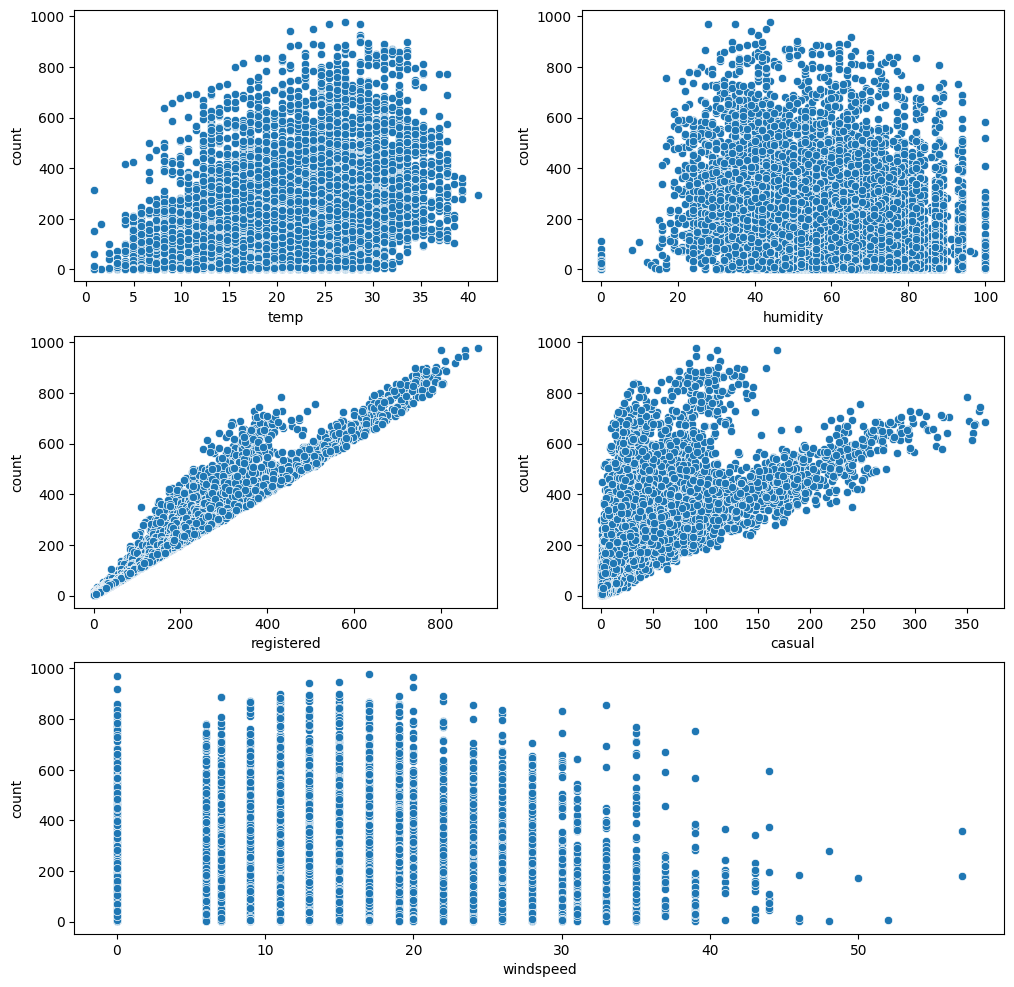

In [ ]:
fig = plt.subplots(3,2,figsize =(12,12))
att = ['temp', 'humidity', 'registered', 'casual']
for i in range(len(att)):
    plt.subplot(3,2,i+1)
    sns.scatterplot(df, x = att[i], y = 'count', palette = 'Set2')
plt.subplot(3,1,3)
sns.scatterplot(df, x = 'windspeed', y = 'count', palette = 'Set2')
plt.show()

**Insights :**

*   From the above plots it is seen that less number of bikes were rented when temperature is below 12 degrees and above 38 degrees.

*   Less number of bikes (about 1%) were rented when the humidity is less than 23.

*   Less number of bikes (about 8%) were rented when the windspeed is greater than 25.

# Correlation between Numerical attributes

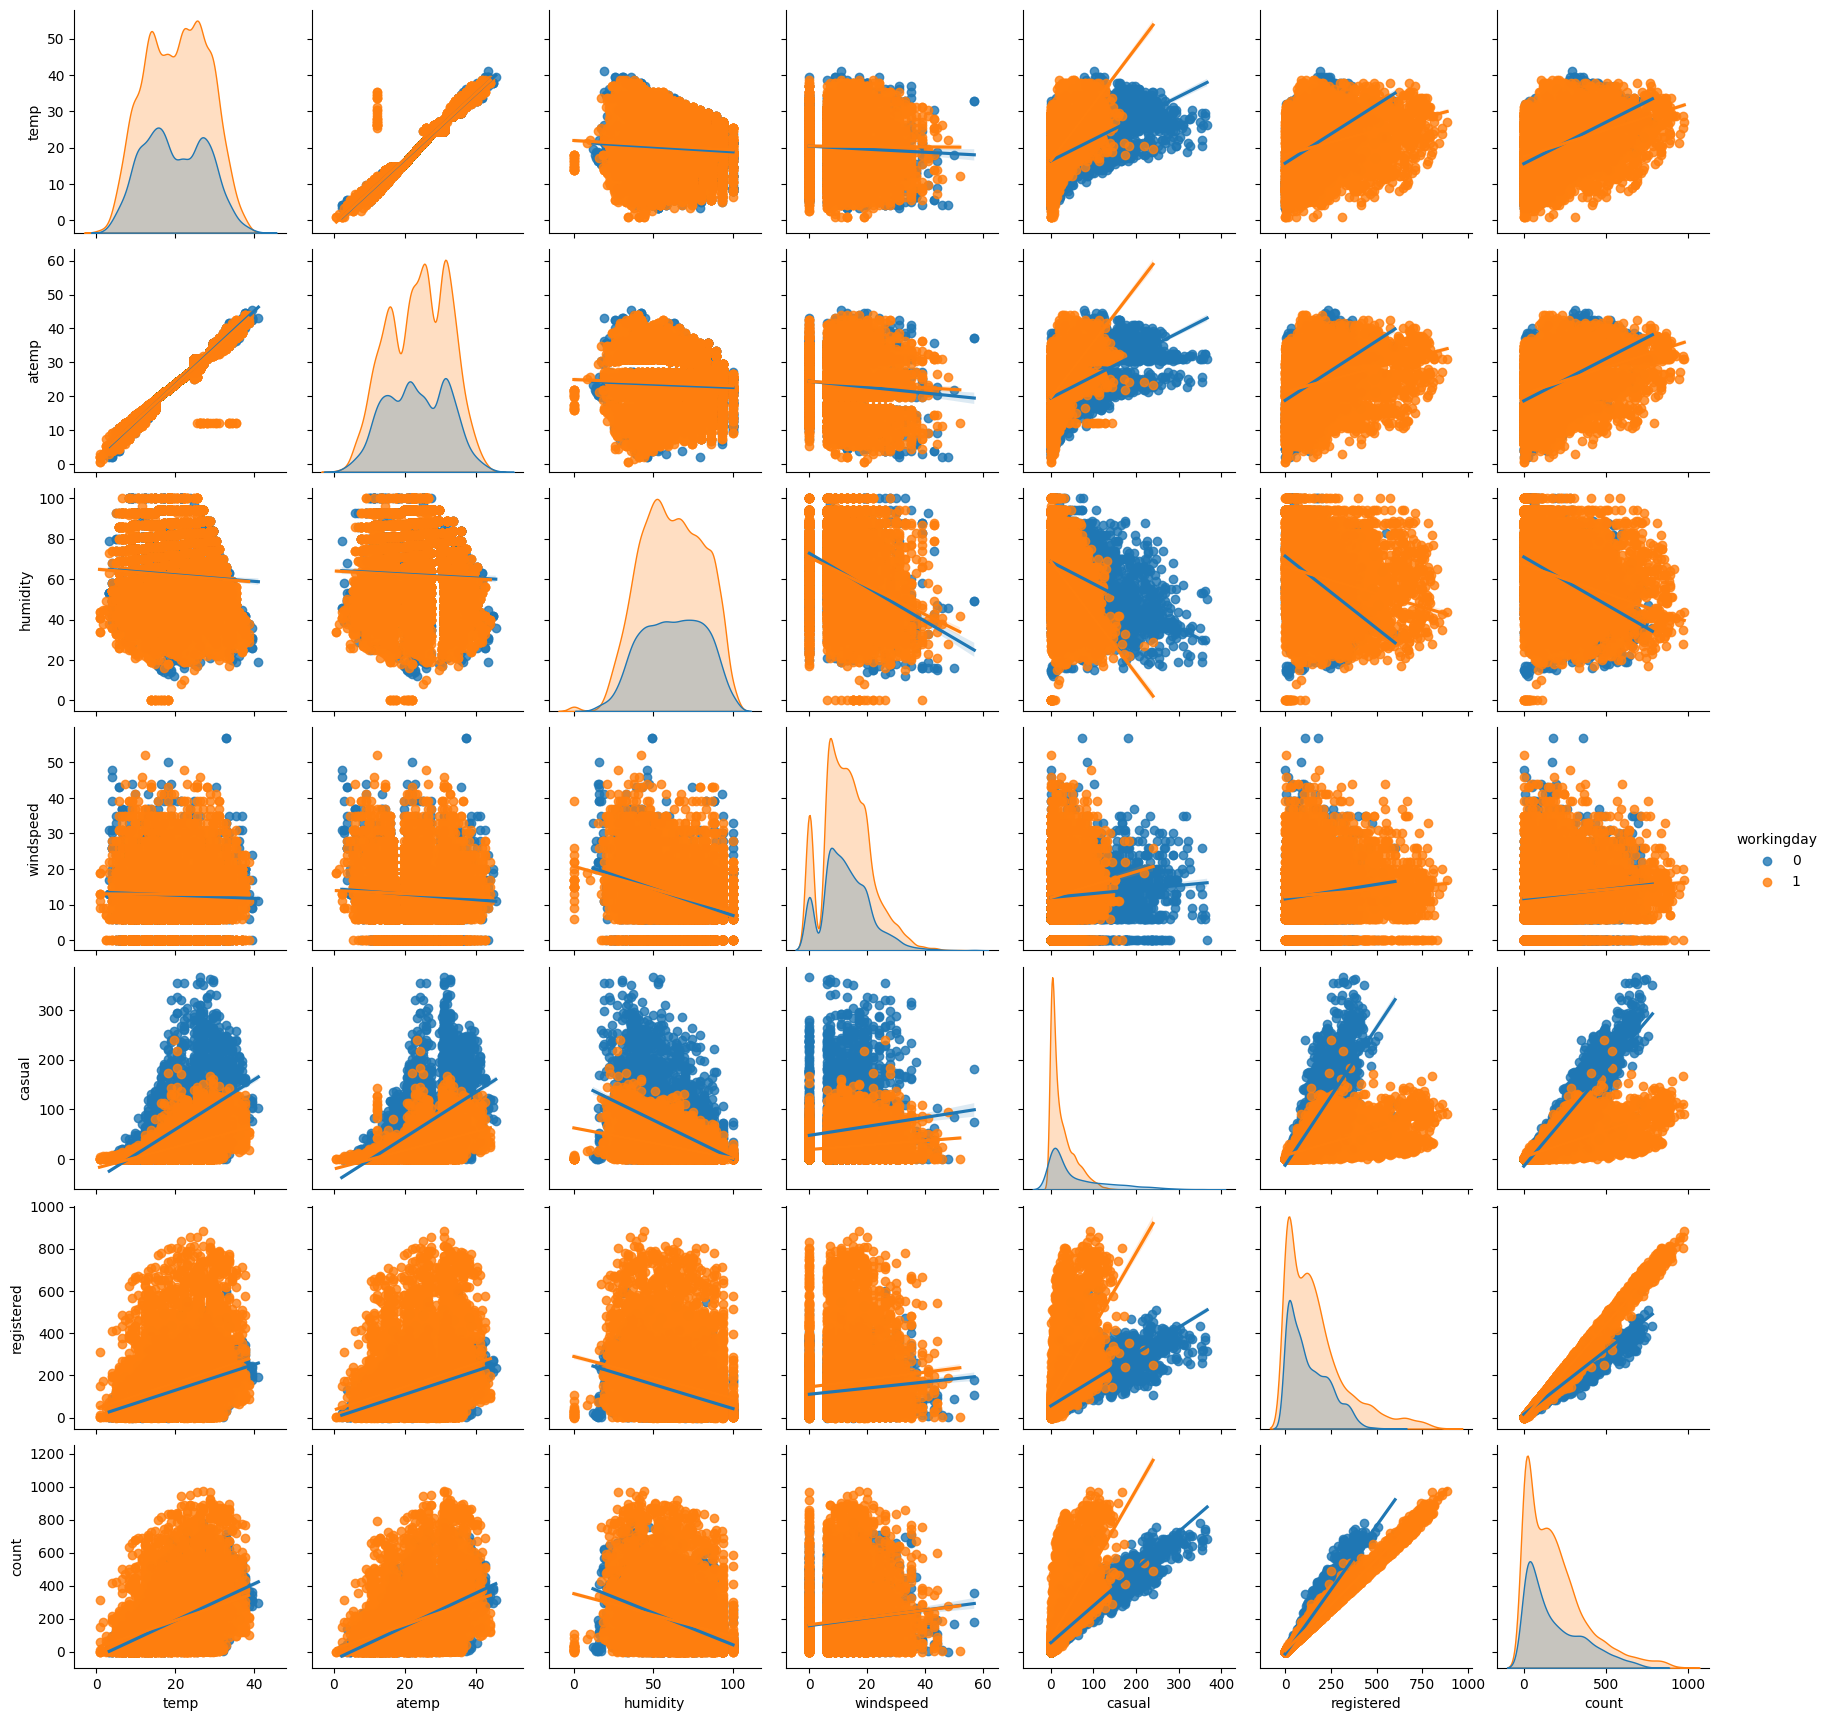

In [ ]:
sns.pairplot(df, kind = 'reg', hue = 'workingday')
plt.show()

In [ ]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


<ipython-input-40-5e7df5b27f8d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True, cmap = 'Purples')


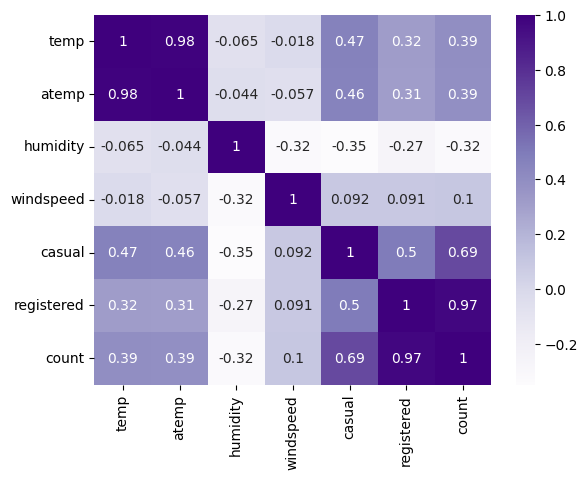

In [ ]:
sns.heatmap(df.corr(), annot =True, cmap = 'Purples')
plt.show()

**Insights :**

*  Least Negatively correlated / zero correlated attributes :
    
    1. temp - humidity
    2. temp - windspeed
    3. humidity - windspeed
    4. humidity - casual
    5. humidity - registered
    6. humidity - count

*   Least Positively correlated attributes :    

    1. windspeed - count
    2. windspeed - casual
    3. windspeed - registered

*   Positvely correlated attributes :     

    1. casual - count
    2. casual - registered
    3. registered - count

# Hypothesis Testing

## 1. To check if workingday has an effect on the number of electric cycles rented ?

In [ ]:
wdf = df.groupby(df['workingday'])['count'].describe()
wdf

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [ ]:
mu_count_workingdays = wdf.loc[0,'mean'].round(2)
mu_count_non_workingdays = wdf.loc[1,'mean'].round(2)
print('mu_count_non_workingdays : ', mu_count_non_workingdays)
print('mu_count_workingdays : ', mu_count_workingdays)

mu_count_non_workingdays :  193.01
mu_count_workingdays :  188.51


### 1. Set up the procedure

**Step 1 - Formulation of Null Hypothesis (HO) and Alternate Hypothesis (HA)**

*   **HO :  Workingday has no effect on the number of bikes rented.**

     **(mu_count_workingdays = mu_count_non_workingdays)**

     The mean count of the total rental bikes is same for working and non-working days.

*   **HA :  Workingday has an effect on the number of bikes rented.**

     **(mu_count_workingdays != mu_count_non_workingdays)**

     The mean count of the total rental bikes is statistically different for working and non-working days.

---

**Step 2 - Define the test statistics by selecting the appropriate test**

*   Here the attribute 'weekday' is a categorical variable with 2 categories which are independent to each other and count is a numerical variable, hence it is best to use t_test for 2 independent sample - **ttest_ind**

*   Under HO the test statistics should follow **normal distribution.**

---

**Step 3 - Checking for the basic assumptions for the Hypothesis**

*   1. Gaussian or Normality check - **Shapiro-Wilk's test , histplot, QQ-plot.**

*   2. Homogenity of Variance - **Levene's test.**

*   3. **Independence** of the observations.

---

**Step 4 -Decide the kind of tail of test**

*   We use two tailed test.

---

**Step 5 - Set up alpha and compute the p_value**

*   We set our **alpha = 5%**
---

**Step 6 - Compare p_value and alpha**

*   Based on the p_value, we reject or accept HO.

*   **p_value < alpha : Reject HO**

*   **p_value > alpha : Accept HO**

### 2. Visualization for Normal Distribution and Homogenity of Variance

**1.Boxplot for working and non-working days**

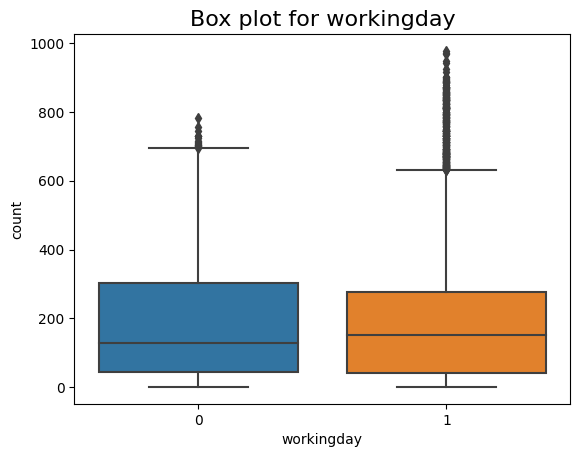

In [ ]:
plt.title("Box plot for workingday",fontsize = 16)
sns.boxplot(df, x = 'workingday', y = 'count')
plt.show()

**2. Histplot with KDE for normality check**

In [ ]:
working = df.loc[df['workingday'] == 1, 'count'].sample(2000)
non_working = df.loc[df['workingday'] == 0, 'count'].sample(2000)

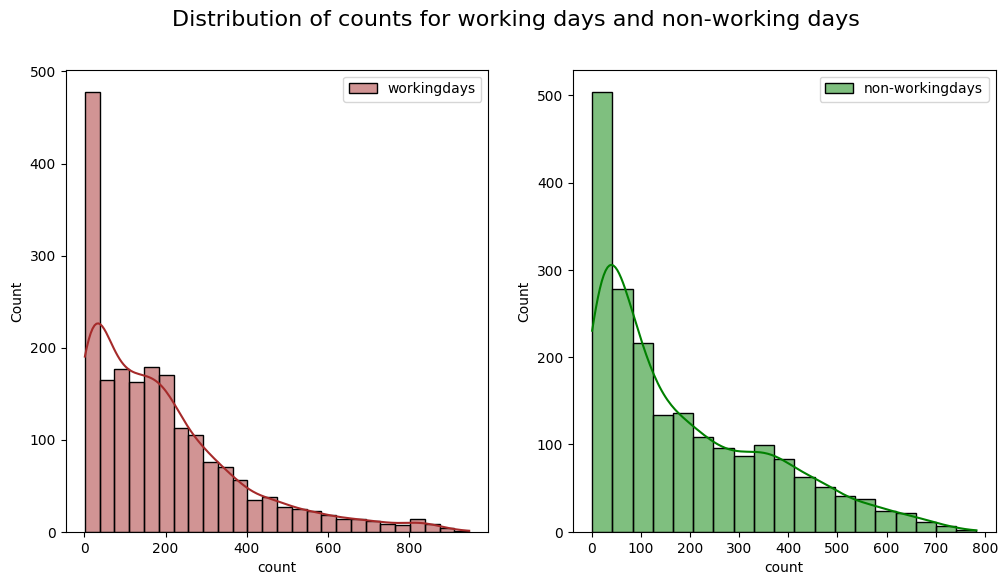

In [ ]:
plt.subplots(1,2,figsize=(12,6))
plt.suptitle("Distribution of counts for working days and non-working days",fontsize=16)
plt.subplot(1,2,1)
sns.histplot(working, kde= True, color = 'brown', label = 'workingdays')
plt.legend()
plt.subplot(1,2,2)
sns.histplot(non_working, kde= True, color = 'green', label = 'non-workingdays')
plt.legend()
plt.show()

**Insights :**

It is observed that the above plots do not follow normal distribution.

**3. QQ plot for normality check**

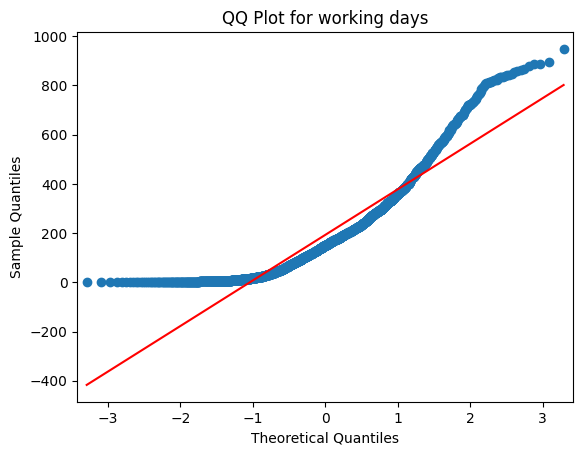

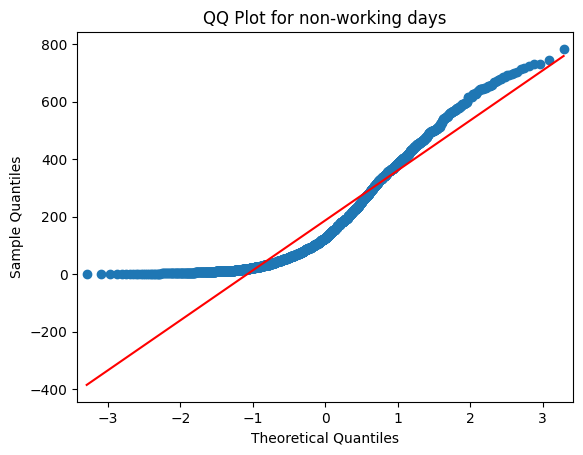

In [ ]:
qqplot(working,line='s')
plt.title('QQ Plot for working days')
qqplot(non_working,line='s')
plt.title('QQ Plot for non-working days')
plt.show()

**Insights :**

*   From the above QQ plot it is evident that the distribution is not normal distribution.

**4. Plot to check Homogenity of Variance**

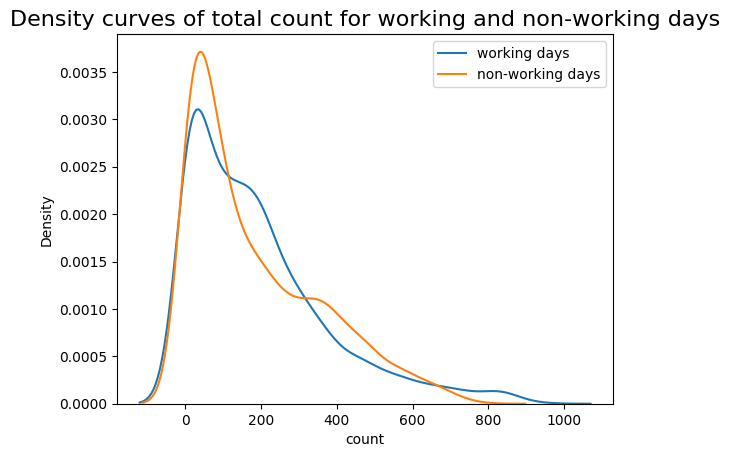

In [ ]:
plt.title("Density curves of total count for working and non-working days",fontsize = 16)
sns.kdeplot(working, label ='working days')
sns.kdeplot(non_working, label = 'non-working days')
plt.legend()
plt.show()

**Insight :**

From the plot it is observed that the data have Homogenity of Variance, since the mean and variance of count (total number of electric cycles rented) is statistically same for working and non-working days.

### 3. Shapiro-Wilk's  test for Normal distribution

**DATA : working and non-working days**

*   **HO :** The data follows normal distribution

*   **HA :** The data does not follow normal distribution

*   Let **alpha = 0.05**

*   Test statistics : **Shapiro-wilk's test**



In [ ]:
# for working days
test_stat, p_value = shapiro(working)
print('p_value for working days :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The data doesnot follow normal distribution")
else:
    print("Fails to reject HO. The data follows normal distribution")

p_value for working days : 1.826808628470598e-38
Reject HO. The data doesnot follow normal distribution


In [ ]:
# for non-working days
test_stat, p_value = shapiro(non_working)
print('p_value for non-working days :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The data doesnot follow normal distribution")
else:
    print("Fails to reject HO. The data follows normal distribution")

p_value for non-working days : 1.4904469650722716e-36
Reject HO. The data doesnot follow normal distribution


**Insights :**

*   Through Shapiro-Wilk test it is evident that the sample data doesnot follow normal distribution.

*   Since the Shapiro-Wilk test fails for the sample data we further conduct Levene's test and finally conduct the 2 sample t_test to conclude with the Hypothesis testing for the sample data.

### 4. Levene's test for Homogenity of Variance

**DATA : workingday**

*   **HO :** The distribution have equal variance

*   **HA :** The distribution have unequal variance

*   Let **alpha = 0.05**

*   Test statistics : **Levene's test**



In [ ]:
test_stat, p_value = levene(working, non_working)
print('p_value :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The distribution have unequal variance")
else:
    print("Fails to reject HO. The distribution have equal variance")

p_value : 0.8322774614054222
Fails to reject HO. The distribution have equal variance


**Insight :**

We conclude that the distribution of the data have unequal variance.

### 5. t_test for 2 independent samples

*   **HO :  mu_workingdays = mu_count_non_workingdays**

     The mean count of the total rental bikes is same for working and non-working days.

*   **HA :  mu_workingdays != mu_count_non_workingdays**

     The mean count of the total rental bikes is statistically different for working and non-working days.

*   Let **alpha = 0.05**

In [ ]:
test_stat, p_value = ttest_ind(working, non_working)
print('p_value :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The mean count of the total rental bikes is statistically different for working and non-working days.")
else:
    print("Fails to reject HO. The mean count of the total rental bikes is same for working and non-working days.")

p_value : 0.301761400475135
Fails to reject HO. The mean count of the total rental bikes is same for working and non-working days.


**Insights :**

**Therefore, the mean count of the total rental bikes is statistically same for both working and non-working days.**

## 2.  To check if the number of electric cycles rented is similar or different in different weather conditions ?

In [ ]:
df.groupby(df['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


### 1. Set up the procedure

**Step 1 - Formulation of Null Hypothesis (HO) and Alternate Hypothesis (HA)**

*   **HO :  Weather has no effect on the number of bikes rented.**

     The mean count of the total rental bikes is same for weather 1, 2 and 3.

*   **HA :  Weather has an effect on the number of bikes rented.**

     The mean count of the total rental bikes is statistically different for weather 1, 2 and 3.

---

**Step 2 - Define the test statistics by selecting the appropriate test**

*   Here the attribute 'weather' is a categorical variable with 4 categories which are independent to each other and count is a numerical variable, hence one_way ANNOVA - **f_oneway** or **kruskal** is applicable here.

*   Under HO the test statistics should follow **f - distribution.**

---

**Step 3 - Checking for the basic assumptions for the Hypothesis**

*   1. Gaussian or Normality check - **Shapiro-Wilk's test , histplot, QQ-plot.**

*   2. Homogenity of Variance - **Levene's test.**

*   3. **Independent** sample cases (groups).

---

**Step 4 - Set up alpha and compute the p_value**

*   We set our **alpha = 5%**
---

**Step 5 - Compare p_value and alpha**

*   Based on the p_value, we reject or accept HO.

*   **p_value < alpha : Reject HO**

*   **p_value > alpha : Accept HO**

In [ ]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
w1 = df.loc[df['weather'] == 1, 'count'].sample(1000)
w2 = df.loc[df['weather'] == 2, 'count'].sample(1000)
w3 = df.loc[df['weather'] == 3, 'count']
w4 = df.loc[df['weather'] == 4, 'count']

**Since there is only one record for weather-4, we cannot perform the ANNOVA test.**

### 2. Visualization for Normal Distribution and Homogenity of Variance

**1. Boxplot for different weather conditions**

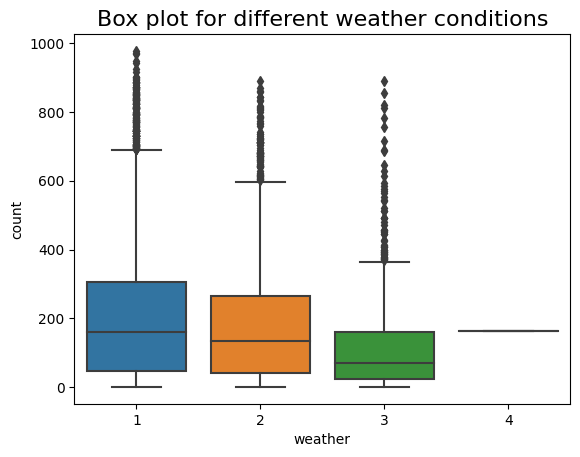

In [ ]:
plt.title("Box plot for different weather conditions",fontsize = 16)
sns.boxplot(df, x ='weather', y ='count')
plt.show()

**2. Histplot with KDE for normality check**

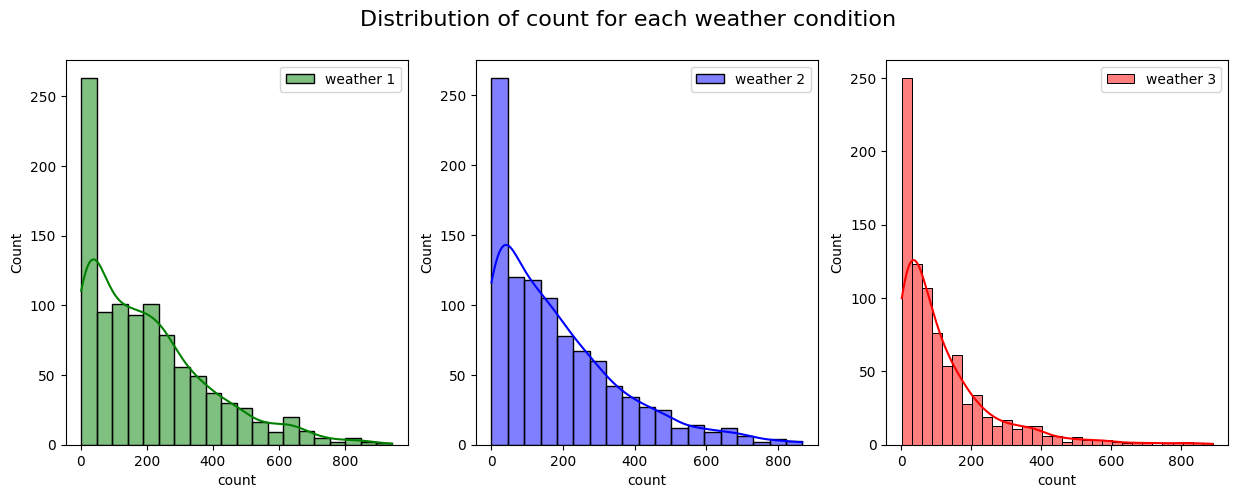

In [ ]:
att = [w1, w2, w3]
clr = ['green', 'blue', 'red']
fig = plt.subplots(1,3,figsize =(15,5))
plt.suptitle("Distribution of count for each weather condition",fontsize =16)
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.histplot(att[i], kde = True, color = clr[i], label = f'weather {i+1}')
    plt.legend()
plt.show()

**Insights :**

It is observed that the above plots do not follow normal distribution.

**3. QQ plot for normality check**

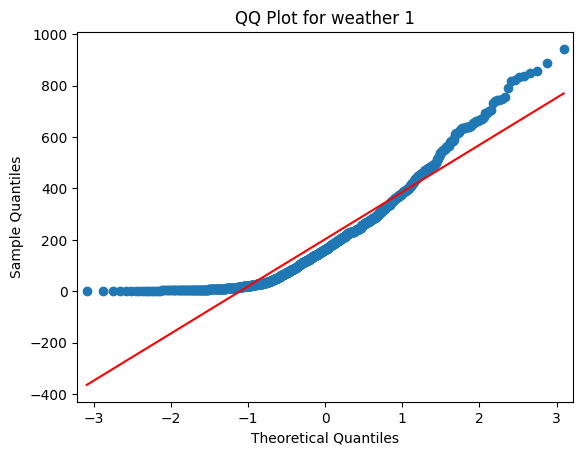

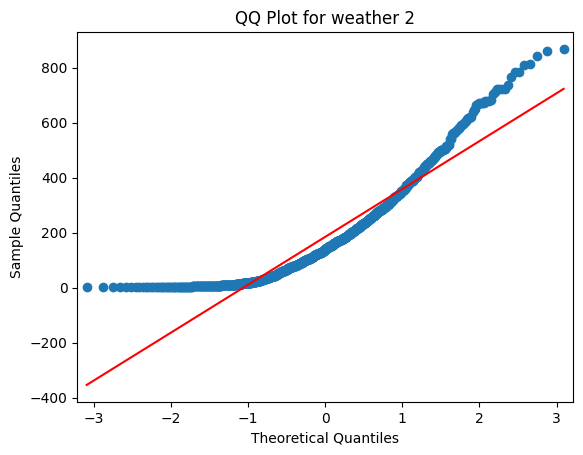

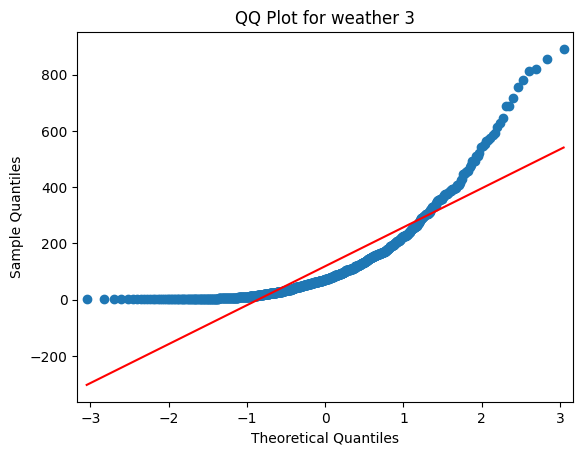

In [ ]:
qqplot(w1, line ='s')
plt.title('QQ Plot for weather 1')

qqplot(w2, line ='s')
plt.title('QQ Plot for weather 2')

qqplot(w3, line ='s')
plt.title('QQ Plot for weather 3')

plt.show()

**Insights :**

It is seen that the above plots do not follow normal distribution.

**4. Plot  to check Homogenity of Variance**

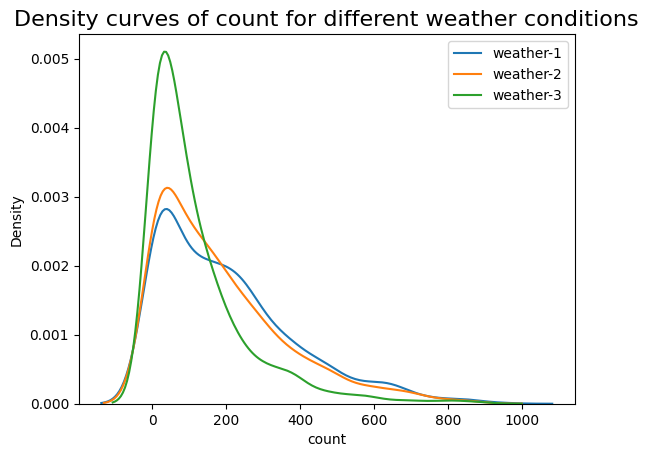

In [ ]:
plt.title("Density curves of count for different weather conditions",fontsize = 16)
sns.kdeplot(w1, label ='weather-1')
sns.kdeplot(w2, label = 'weather-2')
sns.kdeplot(w3, label ='weather-3')
plt.legend()
plt.show()

### 3. Shapiro-Wilk's test for Normal distribution

**DATA : weather 1, 2 and 3**

*   **HO :** The data follows normal distribution

*   **HA :** The data does not follow normal distribution

*   Let **alpha = 0.05**

*   Test statistics : **Shapiro-wilk's test**



In [ ]:
# for weather 1
test_stat, p_value = shapiro(w1)
print('p_value for weather 1 :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The data doesnot follow normal distribution")
else:
    print("Fails to reject HO. The data follows normal distribution")

p_value for weather 1 : 1.0887418177386711e-25
Reject HO. The data doesnot follow normal distribution


In [ ]:
# for weather 2
test_stat, p_value = shapiro(w2)
print('p_value for weather 2 :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The data doesnot follow normal distribution")
else:
    print("Fails to reject HO. The data follows normal distribution")

p_value for weather 2 : 2.2030375596105323e-27
Reject HO. The data doesnot follow normal distribution


In [ ]:
# for weather 3
test_stat, p_value = shapiro(w3)
print('p_value for weather 3 :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The data doesnot follow normal distribution")
else:
    print("Fails to reject HO. The data follows normal distribution")

p_value for weather 3 : 3.876090133422781e-33
Reject HO. The data doesnot follow normal distribution


**Insights :**

It is seen that the data do not follow normal distribution.

### 4. Levene's test for Homogenity of Variance

**DATA : weather**

*   **HO :** The distribution have equal variance

*   **HA :** The distribution have unequal variance

*   Let **alpha = 0.05**

*   Test statistics : **Levene's test**



In [ ]:
 test_stat, p_value = levene(w1, w2, w3)
print('p_value :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The distribution have unequal variance")
else:
    print("Fails to reject HO. The distribution have equal variance")

p_value : 3.187759992377341e-20
Reject HO. The distribution have unequal variance


**Insights :**

It is seen that the distribution of data have unequal variance.

**Thus the assumptions required for one_way ANNOVA test fail - normal distribution of data and equal variance of data both fail. Thus conduct Kruskal's test.**

### 5. ANNOVA test

*   **HO : The mean count of the total rental bikes is same for weather 1, 2 and 3.**

*   **HA : The mean count of the total rental bikes is statistically different for weather 1, 2 and 3.**

*   Let **alpha = 0.05**

*   Test statistics : **f_oneway**

In [ ]:
test_stat, p_value = f_oneway(w1,w2,w3)
print('p_value :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The mean count of the total rental bikes is statistically different for weather 1, 2 and 3.")
else:
    print("Fails to reject HO. The mean count of the total rental bikes is same for weather 1, 2 and 3.")

p_value : 2.5284898221392322e-27
Reject HO. The mean count of the total rental bikes is statistically different for weather 1, 2 and 3.


### 6. Kruskal's test

*   **HO : The mean count of the total rental bikes is same for weather 1, 2 and 3.**

*   **HA : The mean count of the total rental bikes is statistically different for weather 1, 2 and 3.**

*   Let **alpha = 0.05**

*   Test statistics : **kruskal**

In [ ]:
test_stat, p_value = kruskal(w1,w2,w3)
print('p_value :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The mean count of the total rental bikes is statistically different for weather 1, 2 and 3.")
else:
    print("Fails to reject HO. The mean count of the total rental bikes is same for weather 1, 2 and 3.")

p_value : 3.858048178897107e-29
Reject HO. The mean count of the total rental bikes is statistically different for weather 1, 2 and 3.


**Insights :**

**The mean count of the total rental bikes is statistically different for different weathers.**

## 3.  To check if the number of electric cycles rented is similar or different in different season ?

In [ ]:
df.groupby(df['season'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


### 1. Set up the procedure

**Step 1 - Formulation of Null Hypothesis (HO) and Alternate Hypothesis (HA)**

*   **HO :  Season has no effect on the number of bikes rented.**

     The mean count of the total rental bikes is same for seasons spring, summer, fall and winter.

*   **HA :  Season has an effect on the number of bikes rented.**

     The mean count of the total rental bikes is statistically different for seasons spring, summer, fall and winter.

---

**Step 2 - Define the test statistics by selecting the appropriate test**

*   Here the attribute 'season' is a categorical variable with 4 categories which are independent to each other and count is a numerical variable, hence one_way ANNOVA - **f_oneway** or **kruskal** is applicable here.

*   Under HO the test statistics should follow **f - distribution**.

---

**Step 3 - Checking for the basic assumptions for the Hypothesis**

*   1. Gaussian or Normality check - **Shapiro-Wilk's test , histplot, QQ-plot.**

*   2. Homogenity of Variance - **Levene's test.**

*   3. **Independent** sample cases (groups).

---

**Step 4 - Set up alpha and compute the p_value**

*   We set our **alpha = 5%**
---

**Step 5 - Compare p_value and alpha**

*   Based on the p_value, we reject or accept HO.

*   **p_value < alpha : Reject HO**

*   **p_value > alpha : Accept HO**

In [ ]:
df['season'].value_counts()

winter    2734
fall      2733
summer    2733
spring    2686
Name: season, dtype: int64

In [ ]:
s1 = df.loc[df['season'] == 'spring', 'count'].sample(1000)
s2 = df.loc[df['season'] == 'summer', 'count'].sample(1000)
s3 = df.loc[df['season'] == 'fall', 'count'].sample(1000)
s4 = df.loc[df['season'] == 'winter', 'count'].sample(1000)

### 2. Visualization for Normal Distribution and Homogenity of Variance

**1. Boxplot for different seasons**

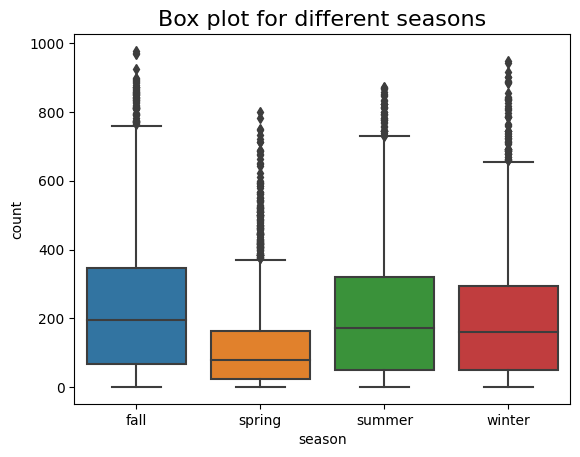

In [ ]:
plt.title("Box plot for different seasons",fontsize = 16)
sns.boxplot(df, x ='season', y ='count')
plt.show()

**2. Histplot with KDE for normality check**

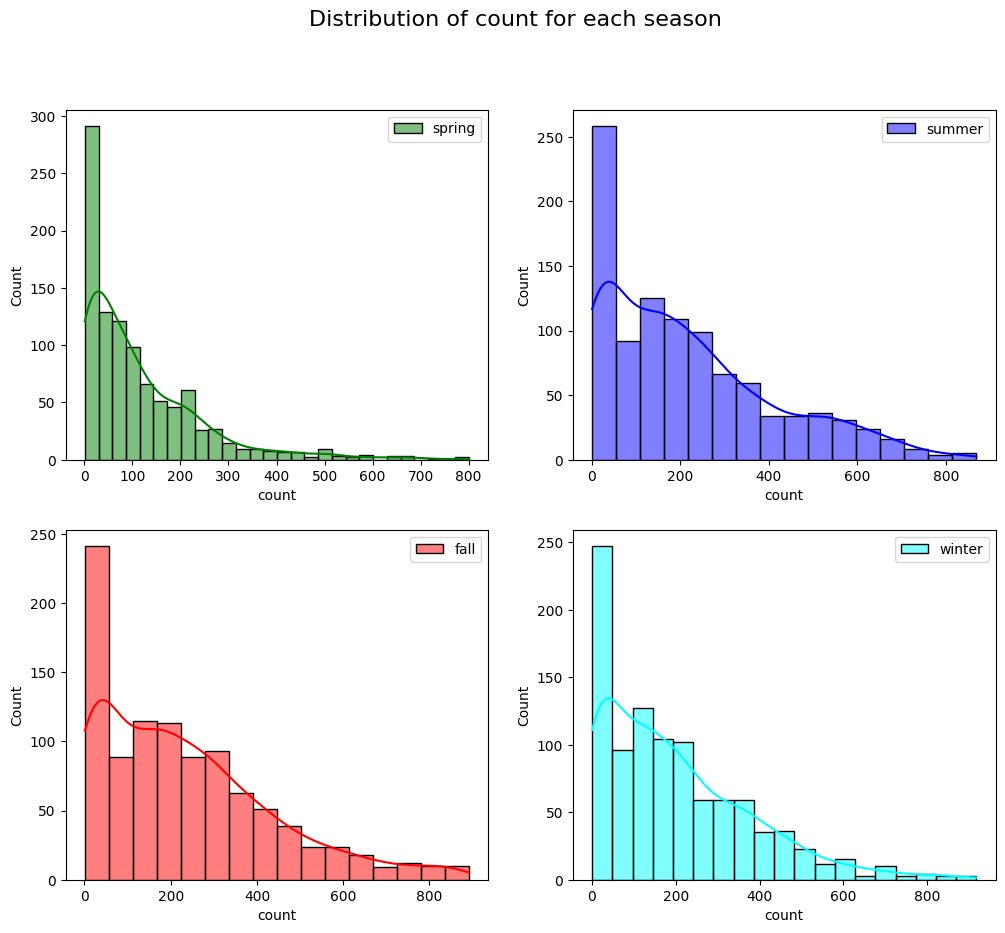

In [ ]:
att = [s1, s2, s3, s4]
s = ['spring', 'summer', 'fall', 'winter']
clr = ['green', 'blue', 'red', 'cyan']
fig = plt.subplots(2,2, figsize =(12,10))
plt.suptitle("Distribution of count for each season",fontsize =16)
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.histplot(att[i], kde = True, color = clr[i], label = s[i])
    plt.legend()
plt.show()

**Insights :**

It is observed that the above plots do not follow normal distribution.

**3. QQ plot for normality check**

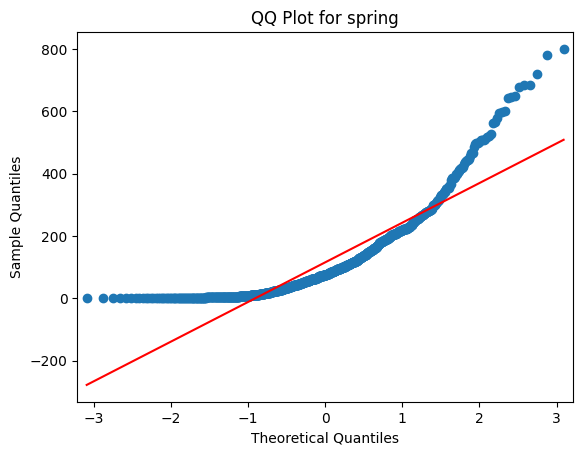

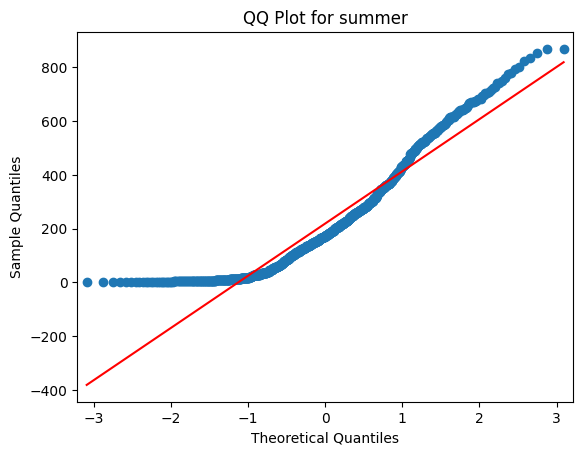

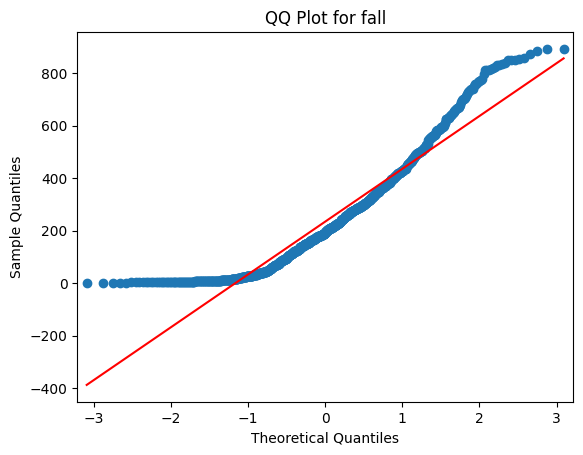

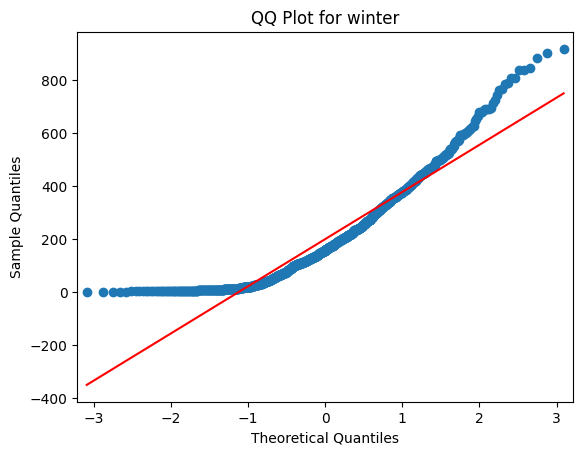

In [ ]:
qqplot(s1, line ='s')
plt.title('QQ Plot for spring')

qqplot(s2, line ='s')
plt.title('QQ Plot for summer')

qqplot(s3, line ='s')
plt.title('QQ Plot for fall')

qqplot(s4, line ='s')
plt.title('QQ Plot for winter')

plt.show()

**Insights :**

It is seen that the above plots do not follow normal distribution.

**4. Plot  to check Homogenity of Variance**

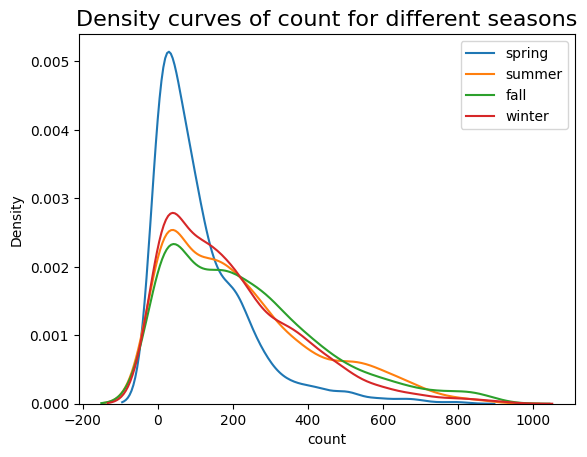

In [ ]:
plt.title("Density curves of count for different seasons", fontsize=16)
sns.kdeplot(s1, label ='spring')
sns.kdeplot(s2, label = 'summer')
sns.kdeplot(s3, label ='fall')
sns.kdeplot(s4, label ='winter')
plt.legend()
plt.show()

### 3. Shapiro-Wilk's test for Normal distribution

**DATA : season - spring, summre, fall and winter**

*   **HO :** The data follows normal distribution

*   **HA :** The data does not follow normal distribution

*   Let **alpha = 0.05**

*   Test statistics : **Shapiro-wilk's test**



In [ ]:
# for spring
test_stat, p_value = shapiro(s1)
print('p_value for spring :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The data doesnot follow normal distribution")
else:
    print("Fails to reject HO. The data follows normal distribution")

p_value for spring : 2.85626264238905e-33
Reject HO. The data doesnot follow normal distribution


In [ ]:
# for summer
test_stat, p_value = shapiro(s2)
print('p_value for summer :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The data doesnot follow normal distribution")
else:
    print("Fails to reject HO. The data follows normal distribution")

p_value for summer : 8.837068351470919e-25
Reject HO. The data doesnot follow normal distribution


In [ ]:
# for fall
test_stat, p_value = shapiro(s3)
print('p_value for fall :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The data doesnot follow normal distribution")
else:
    print("Fails to reject HO. The data follows normal distribution")

p_value for fall : 4.173078527354131e-24
Reject HO. The data doesnot follow normal distribution


In [ ]:
# for winter
test_stat, p_value = shapiro(s4)
print('p_value for winter :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The data doesnot follow normal distribution")
else:
    print("Fails to reject HO. The data follows normal distribution")

p_value for winter : 2.2459121421055745e-25
Reject HO. The data doesnot follow normal distribution


**Insights :**

It is seen that the data do not follow normal distribution.

### 4. Levene's test for Homogenity of Variance

**DATA : season**

*   **HO :** The distribution have equal variance

*   **HA :** The distribution have unequal variance

*   Let **alpha = 0.05**

*   Test statistics : **Levene's test**



In [ ]:
 test_stat, p_value = levene(s1, s2, s3, s4)
print('p_value :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The distribution have unequal variance")
else:
    print("Fails to reject HO. The distribution have equal variance")

p_value : 5.244057471119392e-43
Reject HO. The distribution have unequal variance


**Insights :**

It is seen that the distribution of data have unequal variance.

**Thus the assumptions required for one_way ANNOVA test fail - normal distribution of data and equal variance of data both fail. Thus conduct Kruskal's test.**

### 5. ANNOVA test

*   **HO : The mean count of the total rental bikes is same for different seasons - spring, summer, fall and winter.**

*   **HA : The mean count of the total rental bikes is statistically different for different seasons - spring, summer, fall and winter.**

*   Let **alpha = 0.05**

*   Test statistics : **f_oneway**

In [ ]:
test_stat, p_value = f_oneway(s1, s2, s3, s4)
print('p_value :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The mean count of the total rental bikes is statistically different for different seasons - spring, summer, fall and winter.")
else:
    print("Fails to reject HO. The mean count of the total rental bikes is same for different seasons - spring, summer, fall and winter.")

p_value : 6.946734039872773e-56
Reject HO. The mean count of the total rental bikes is statistically different for different seasons - spring, summer, fall and winter.


### 6. Kruskal's test

*   **HO : The mean count of the total rental bikes is same for different seasons - spring, summer, fall and winter.**

*   **HA : The mean count of the total rental bikes is statistically different for different seasons - spring, summer, fall and winter.**

*   Let **alpha = 0.05**

*   Test statistics : **kruskal**

In [ ]:
test_stat, p_value = kruskal(s1, s2, s3, s4)
print('p_value :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. The mean count of the total rental bikes is statistically different for different seasons - spring, summer, fall and winter.")
else:
    print("Fails to reject HO. The mean count of the total rental bikes is same for different seasons - spring, summer, fall and winter.")

p_value : 1.556640684642695e-57
Reject HO. The mean count of the total rental bikes is statistically different for different seasons - spring, summer, fall and winter.


**Insights :**

**The mean count of the total rental bikes is statistically different for different seasons - spring, summer, fall and winter.**

## 4. To check if weather is dependent on season ?

In [ ]:
contingency_tab = pd.crosstab(df['weather'], df['season'], values = df['count'], aggfunc =np.sum)
contingency_tab

season,fall,spring,summer,winter
weather,,,,
1,470116,223009,426350,356588
2,139386,76406,134177,157191
3,31160,12919,27755,30255
4,0,164,0,0


### 1. Set up the procedure

**Step 1 - Formulation of Null Hypothesis (HO) and Alternate Hypothesis (HA)**

*   **HO :  Weather and Season are independent**

*   **HA :  Weather and Season are dependent**

---

**Step 2 - Define the test statistics by selecting the appropriate test**

*   Here the attributes 'weather' and 'season' both are categorical variables each having 4 categories which are independent to each other, hence Chi-square test is applicable here- **chi2_contingency**

*   Under HO the test statistics should follow Chi-square distribution.

---

**Step 3 - Checking for the basic assumptions for the Hypothesis (non- parametric)**

*   1. Check if **both variables are categorical.**

*   2. All observations are **independent.**

*   3. Cells in the contingency table are **mutually exculsive.**

*   4. Expected **value of cells should be greater than 5 or more** in atleast 80% of the cells.

---

**Step 4 - Set up alpha and compute the p_value**

*   We set our **alpha = 5%**
---

**Step 5 - Compare p_value and alpha**

*   Based on the p_value, we reject or accept HO.

*   **p_value < alpha : Reject HO**

*   **p_value > alpha : Accept HO**

In [ ]:
contingency_tab

season,fall,spring,summer,winter
weather,,,,
1,470116,223009,426350,356588
2,139386,76406,134177,157191
3,31160,12919,27755,30255
4,0,164,0,0


**Since, weather-4 has only one record(value < 80% of cells), we shall drop it.**

In [ ]:
contingency_tab = pd.crosstab(index = df['weather'], columns = df['season'], values = df['count'], aggfunc =np.sum)
contingency_tab =contingency_tab.drop(4)
contingency_tab

season,fall,spring,summer,winter
weather,,,,
1,470116,223009,426350,356588
2,139386,76406,134177,157191
3,31160,12919,27755,30255


In [ ]:
contingency_tab

season,fall,spring,summer,winter
weather,,,,
1,470116,223009,426350,356588
2,139386,76406,134177,157191
3,31160,12919,27755,30255


### 2. Visualization

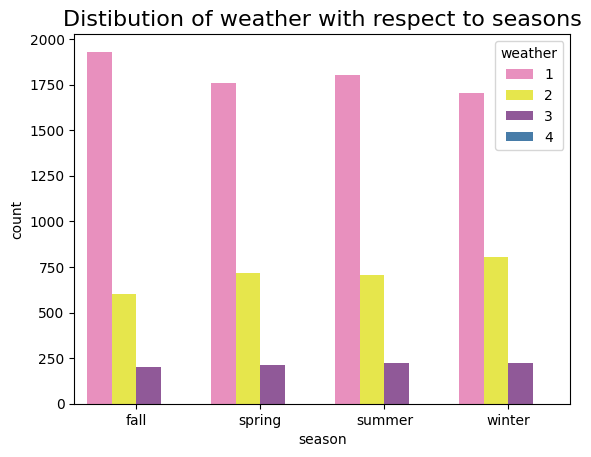

In [ ]:
plt.title("Distibution of weather with respect to seasons", fontsize =16)
sns.countplot(df, x = 'season', hue = 'weather', palette = 'Set1_r')
plt.show()

**Insight :**

*   There is almost the same distribution of weather for each season.

### 3. Chi2_contingency test


*   **HO :  Weather and Season are independent.**

*   **HA :  Weather and Season are dependent.**

*   Let **alpha = 0.05**

*   Test statistics : **chi2_contingency**

In [ ]:
test_stat, p_value, dof, expected_freq = chi2_contingency(contingency_tab)
print('p_value :',p_value )
alpha = 0.05
if p_value < alpha:
    print("Reject HO. Weather and Season are dependent.")
else:
    print("Fails to reject HO. Weather and Season are independent.")

p_value : 0.0
Reject HO. Weather and Season are dependent.


**Insight :**

**Hence it is statistically proven that weather and season are dependent.**

# Insights :

•   There are about 10886 rows and 12 columns in the given dataset.

•   The given dataset is from January 2011 to December 2012, and the range is about 2 complete years.

•   There is a positive growth in the number of bikes that were rented across each month over the year. Thus there is a significant increase in demand for bikes in the upcoming years too.

•	There is a drastic rise in the demand for the number of rental bikes over the first 6 months, later it becomes stagnant and gradually decreases over the end of the year.

•	The maximum number of bikes were rented during peak hours of the day be it in the morning (6 am to 9 am) and evening (3 pm to 7 pm).

•	 Almost 75% of the bikes rented were less than 284 count.

•	On an hourly basis the mean number of total rental bikes for casual and registered is 36 and 155.

•	The median count of bikes rented was 145 on an hourly basis.

•   About 75 % of the bikes were rented on the days when the temperature is less than 26 degrees Celsius.

•	About 25 % of the bikes were rented on the days when the temperature was below 14 degrees Celsius.

•	The median number of total electric cycles were rented on the days when humidity is less than 62 and windspeed less than 13.

•	1 % of bikes were rented when the humidity was less than 23.

•	8 %of bikes were rented when the windspeed was greater than 25.

•	Only about 3% of the total bikes were rented on holidays and the rest 97% of bikes were rented on non-holiday days.

•	Almost 68% of the bikes were rented on weekdays, and 32% of bikes were rented on weekdays.

•	About 66% of bikes were rented on days having weather 1 ( clear, few clouds, partly cloudy), and a very negligible number of 0.01% of bikes were rented on days having weather 4 (heavy rain, ice pallets, thunderstorm, mist, snow+ fog).

•	Irrespective of the season, the maximum number of bikes were rented on weekdays compared to the weekends

•	Irrespective of the season, the maximum number of bikes were rented on non-holiday days compared to the days which are a holiday.

•	Whether it is a working, non-working, holiday, or a non-holiday day, most bikes were rented on the days having clear, few clouds or partly cloudy weather (weather 1).

•	The mean count of the total rental bikes is statistically the same for both working and non-working days

•	The mean count of the total rental bikes is statistically different for different weathers.

•	The mean count of the total rental bikes is statistically different for different seasons - spring, summer, fall, and winter.

•	It is statistically proven that weather and season are dependent.


# Recommendations :

**1. Seasonal Offers :**

In Springs and Winters, reasonable offers can be applied for a certain duration of period, to attract more customers and to promote the use of rental electric cycles.

**2. Customer Convenience :**

Providing umbrellas, rain jackets, or water bottles according to the weather improves customer experience, thus creating a positive impact on the company.

**3. Optimize inventory :**

Analyze the usage of rental bikes during peak hours and thus manage to provide the required number of bikes during these time period.

**4. Bike Maintenance :**

According to the usage of electric bikes during different seasons and weather, the company has to take care of maintaining the electric bikes in a good condition. Frequent maintenance check has to be done.

**5. Weather Based Offers :**

Based on the condition of the weather, the company may provide offers to promote the brand.

**6. Pricing during peak hours:**

The company can increase the price or the fare of the rides during peak hours of the day when there is more demand, to increase profits. Also this creats an option to the customers to book during non peak hours as the prices are comparitively low. Thus maintains a balanced supply of bikes.

**7. Social media marketing :**

Releasing eye-catching advertisements and promotions for online bookings of rides through social media can increase the number of customers.

**8. App updation with smart features :**

Easy booking of rides and convenient features like canceling the ride before u start may attract more customers to use the app.

**9. Customer Feedback :**

Collecting the feedback after the rides may provide reasonable insights to improve the business.

**10. Loyalty/ Special Day Offers :**

For loyal customers coupons/discounts can be given on some particular special days like national festivals. Thus retaining the existing customers to increase profits.

**Thank You**